# <center>AI SATURDAYS DONOSTIA 2020<center>
## <center>Regresión Indicador "LowMood" (Bajo Estado de Ánimo)</center>    
## <center>Proyecto Práctico Equipo FACEMOOD</center>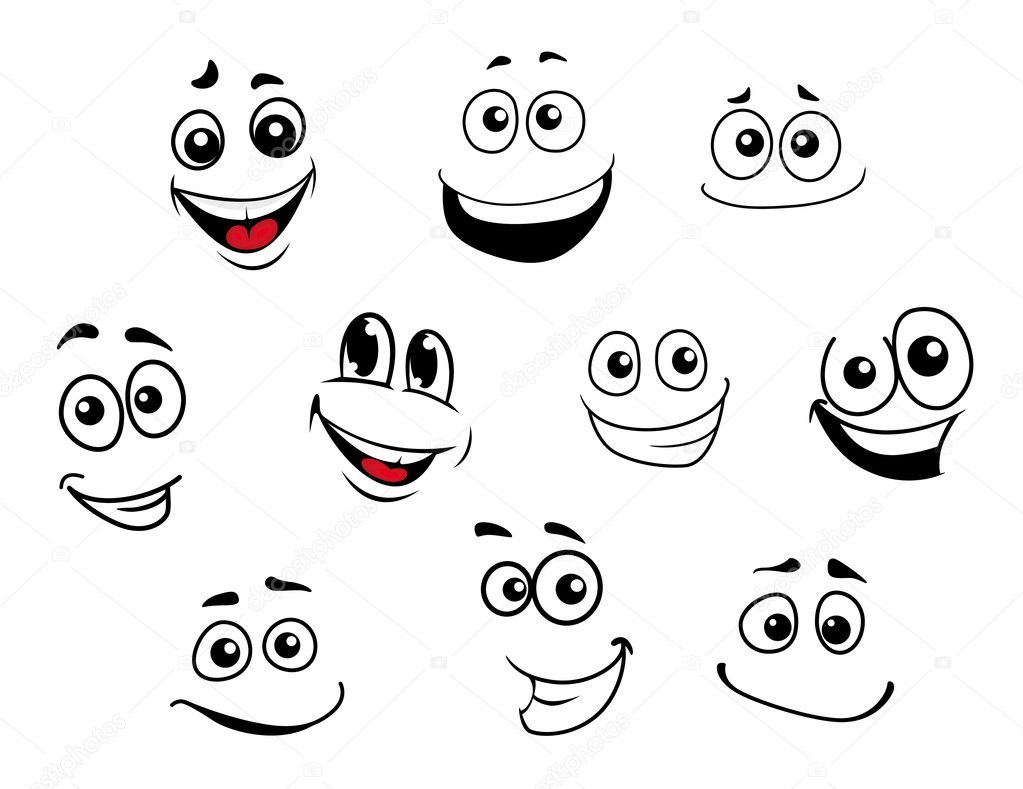

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from regresion_functions import *
%load_ext autoreload
%autoreload 2

### Conjunto de Datos

In [2]:
df = pd.read_csv('../processed-data/tidy_socialmedia_data.csv', index_col=0)
df.drop('full_count', axis=1, inplace=True)
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0


### Las 11 variables estudiadas (8 relacionadas a "depresión" y 3 relacionadas al uso de "Redes Sociales")

In [3]:
df2 = df.iloc[:,12:]
df2.head()

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
1,61.0,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0
2,28.0,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0
3,24.0,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0
4,63.0,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0
6,16.0,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0


### Estadísticas descriptivas de las 11 variables

In [4]:
df2.describe()

,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
count,8652.000000,8647.000000,8646.000000,8643.000000,8646.000000,8646.000000,8649.000000,8648.000000,8644.000000,8647.000000,8645.000000
mean,36.987171,13.150919,11.971085,26.389795,25.501619,10.583854,12.023124,20.639801,31.604350,20.804788,21.410642
std,29.717460,18.278325,16.962882,26.086166,26.272407,15.485521,16.733406,23.184786,29.214782,24.890481,25.321793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,6.000000,5.000000,19.000000,18.000000,3.000000,5.000000,14.000000,24.000000,12.000000,12.000000
75%,64.000000,20.000000,18.000000,45.000000,40.000000,17.000000,19.000000,30.000000,61.000000,31.000000,33.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Medias por participante

In [5]:
dfmean=df.groupby('Participant').mean()
dfmean=dfmean.iloc[:,6:]
dfmean=dfmean[["ASMU", "News", "PSMU", "Stress", "Hopeless", "Inferior", "LossOfInt", "Concentrat", "Loneliness", "Fatigue", "LowMood"]]
print(dfmean.head())
print("No. Filas/Columnas del Conjunto de Datos: {}".format(dfmean.shape))

                  ASMU       News       PSMU     Stress   Hopeless   Inferior  \
Participant                                                                     
115091       16.792208  15.012987  32.883117  37.441558  21.389610  17.831169   
131183       28.254237  11.593220  45.203390  16.898305   0.406780   0.254237   
438907       27.040816  34.645833  44.595745  25.000000  14.591837  23.395833   
515070       37.826923  38.576923  25.711538  17.365385  10.500000  11.403846   
572172       40.545455  45.250000  36.852273  20.511364  17.431818  38.056818   

             LossOfInt  Concentrat  Loneliness    Fatigue    LowMood  
Participant                                                           
115091       47.675325   37.272727   23.285714  45.155844  20.454545  
131183       14.508475   19.508475    0.389831  36.288136   3.474576  
438907       50.979592   35.729167   21.833333  51.040816  26.285714  
515070       16.038462   32.903846   14.076923  34.865385  12.692308  
572172

### Estadísticas descriptivas de las medias por participante

In [6]:
dfmean.describe()

,ASMU,News,PSMU,Stress,Hopeless,Inferior,LossOfInt,Concentrat,Loneliness,Fatigue,LowMood
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,21.265517,20.329226,31.265974,20.555942,11.852346,10.360674,25.175316,26.568285,11.900892,37.066547,13.015210
std,15.387645,15.665447,14.071410,14.524215,10.889494,10.527341,14.705502,14.376593,11.066729,17.373640,11.226345
min,0.314815,0.308642,3.342857,0.180556,0.000000,0.000000,0.407407,0.474359,0.000000,0.802469,0.000000
25%,9.189189,6.705882,21.041667,8.222222,2.945946,1.319149,13.000000,15.574713,2.176471,24.202532,3.227848
50%,20.867647,16.566265,30.159420,19.634921,8.690909,6.448276,24.543478,25.810127,9.140625,38.150000,11.185185
75%,28.971831,31.017241,38.915493,32.277108,18.049383,17.231884,34.872340,35.333333,19.063492,49.244186,21.173913
max,77.863636,72.393939,75.413043,61.482353,52.952941,52.658824,70.224138,70.562500,53.788235,78.378947,54.141176


### Diagrama de Matriz para las Medias de las 11 Variables

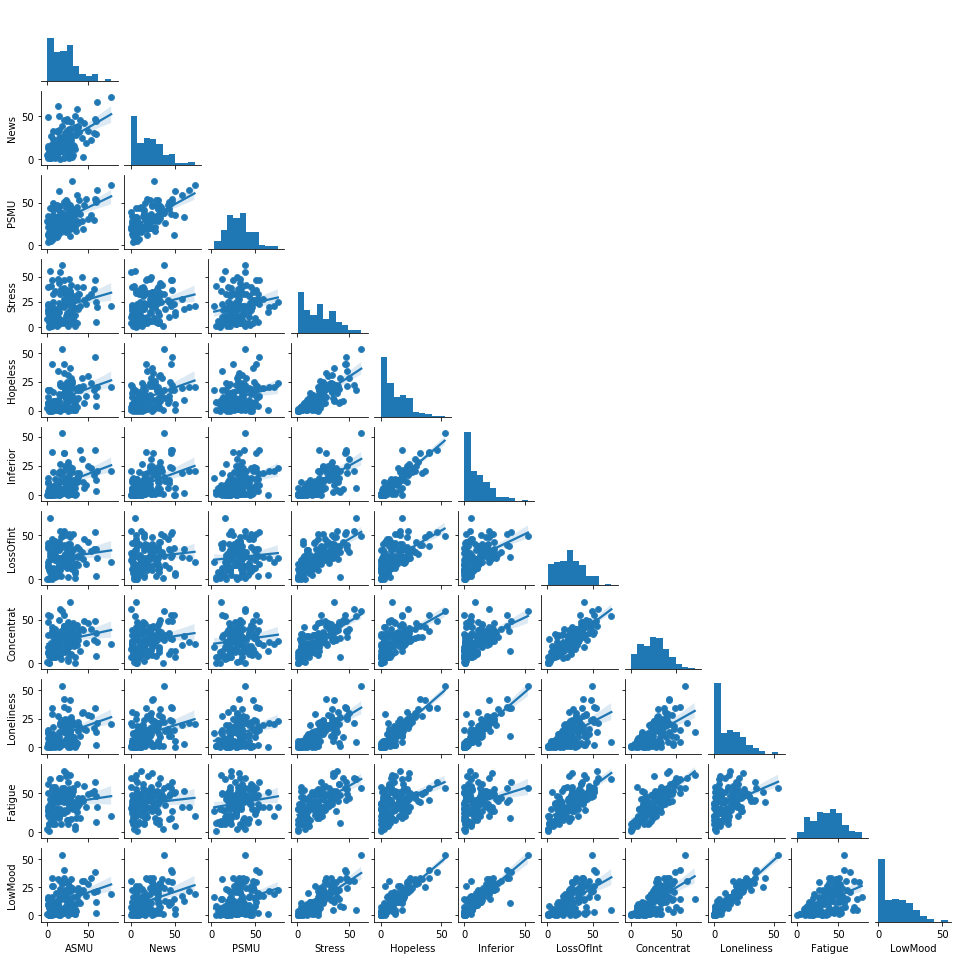

In [7]:
printMatrixDiagram(dfmean)   # Función definida en "regresion_functions"

### Correlaciones de Pearson para las Medias de las 11 Variables

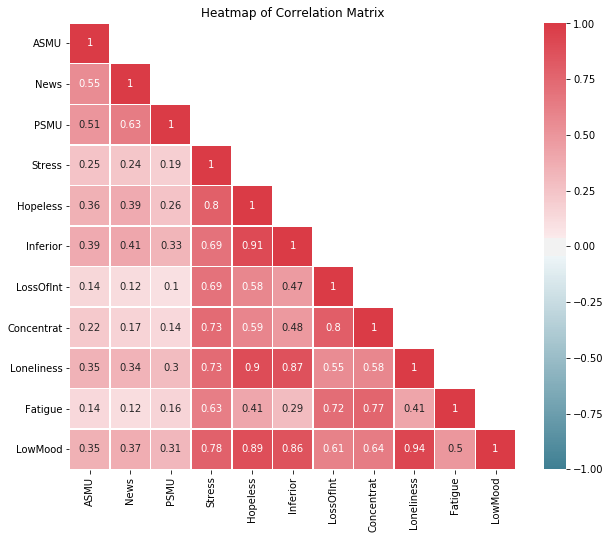

In [8]:
printPearsonCorrelations(dfmean)   # Función definida en "regresion_functions"

### Se observan correlaciones más significativas entre las siguientes variables:

Fatigue vs Concentrat

Fatigue vs LossOfInt

LowMood vs Loneliness

LowMood vs Inferior

LowMood vs Hopeless

LowMood vs Stress

Loneliness vs Inferior

Loneliness vs Hopeless (90,3%, indicando "multicolinealidad")

Loneliness vs Stress

Concentrat vs LossOfInt 

Inferior vs Hopeless (90,7%, indicando "multicolinealidad")

Hopeless vs Stress

### Regresión Lineal para las Medias: y = DeprMood, X = Demás Variables

In [9]:
dfmean=df.groupby('Participant').mean()
dfmean=dfmean.iloc[:,6:]

label = dfmean.LowMood
dfmean.drop('LowMood', axis=1, inplace=True)
dfmean.drop('Hopeless', axis=1, inplace=True)   # Muy correlacionado con Loneliness & Inferior (>90% -> multicolinealidad)

### Proceso de eliminación de variables X que no contribuyen significativamente para explicar y

In [10]:
resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'RMSE_Testing': [],
                                   'R2_Training': [],'R2_Testing': [],'p_value_max':[],'removed_var':[]})

data_list_medias = calculateRegression(dfmean, label, resultsummary, alpha=0.15)   # Función definida en "regresion_functions"

   iteration  intercept  RMSE_Training  RMSE_Testing  R2_Training  R2_Testing  \
0        0.0     -1.628          3.254         3.815        0.915       0.885   
1        1.0     -1.623          3.254         3.814        0.915       0.885   
2        2.0     -1.438          3.256         3.809        0.915       0.885   
3        3.0     -1.359          3.265         3.785        0.915       0.887   
4        4.0     -1.281          3.299         4.111        0.913       0.866   
5        5.0     -0.341          3.347         4.132        0.910       0.865   
6        6.0     -0.634          3.366         4.009        0.909       0.873   

   p_value_max removed_var  
0        0.878  Concentrat  
1        0.671        PSMU  
2        0.628   LossOfInt  
3        0.189    Inferior  
4        0.308     Fatigue  
5        0.194        ASMU  
6        0.133           -  

Modelo Final
['Loneliness', 'Stress', 'News']
[0.78608676 0.17296278 0.03979688] -0.6337034002841335
RMSE of Linear Re

### Análisis de Residuos Modelo Final

Estadística prueba normalidad Kolmogorov-Smirnov=0.133, pvalue=0.053

Probablemente Normal


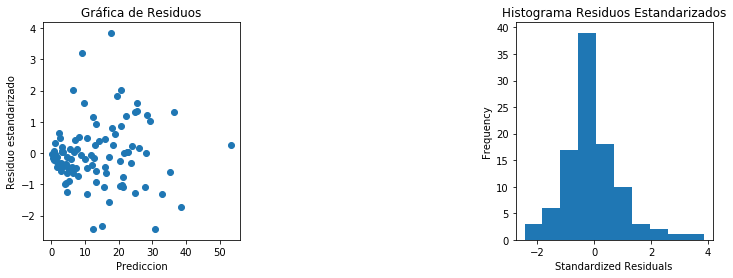

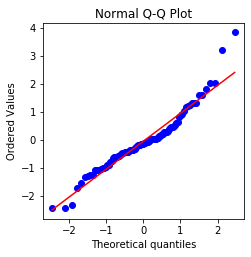

In [11]:
fitt = data_list_medias[5]
standardized_residuals = data_list_medias[4]

residualAnalysis(fitt, standardized_residuals)   # Función definida en "regresion_functions"

### Se observan 2 outliers en el análisis de residuos del modelo final.

### Próximos pasos: Eliminar estos 2 outliers del conjunto de datos y volver a ajustar el modelo final.

In [12]:
# Eliminar Outliers

X_train = data_list_medias[0]
y_train = data_list_medias[2]
standardized_residuals = data_list_medias[4]

eliminacionoutliers = eliminateOutliers(X_train, y_train, standardized_residuals)   # Función definida en "regresion_functions"

Participantes Outliers Eliminados: [6300494, 5089192]


In [13]:
# Volver a ajustar el Modelo Final sin Outliers

X_train = eliminacionoutliers[0]
y_train = eliminacionoutliers[1]
X_test = data_list_medias[1]
y_test = data_list_medias[3]

resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'R2_Training': []})

data_list_medias_sinoutlier = repeatRegression(X_train, y_train, X_test, y_test, resultsummary)   # Función definida en "regresion_functions"

   iteration  intercept  RMSE_Training  R2_Training  R2_Testing  RMSE_Testing
0        0.0     -0.855          2.909        0.931       0.874         3.998

Modelo Final Sin Outlier
['Loneliness', 'Stress', 'News']
[0.78080015 0.17884387 0.03550915] -0.85504395813917
RMSE of Linear Regression Model with Training Data: 2.91
RMSE of Linear Regression Model with Testing Data: 4.00
R2 Coefficient for Linear Regression Model with Training Data: 0.931
R2 Coefficient for Linear Regression Model with Testing Data: 0.874


### Análisis de Residuos Modelo Final sin Outliers

Estadística prueba normalidad Kolmogorov-Smirnov=0.110, pvalue=0.172

Probablemente Normal


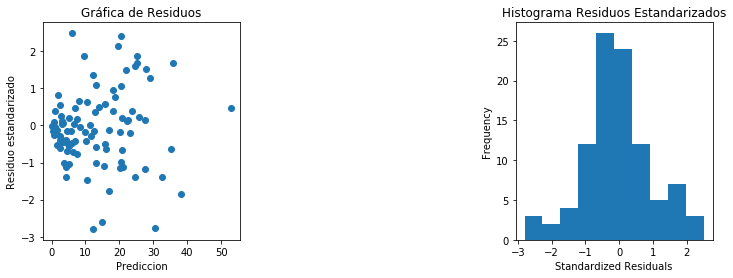

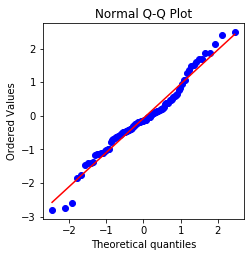

In [14]:
fitt = data_list_medias_sinoutlier[3]
standardized_residuals = data_list_medias_sinoutlier[2]

residualAnalysis(fitt, standardized_residuals)   # Función definida en "regresion_functions"

## Conclusión Final Modelo Ajustado (y = LowMood)
####  

### El coeficiente de determinación (R2) del modelo ajustado para las "medias" es alto (93,1%).
### Como el Análisis de Residuos también ha sido considerado satisfactorio, se valida el modelo bajo un punto de vista estadístico.
####  
### LowMood  =  -0,85 + 0,78 Loneliness + 0,18 Stress + 0,04 News